# Phân tích khả năng logic tính toán của học sinh giữa các nhóm học sinh từ nhóm quốc gia khác nhau

#### Họ và Tên: Trần Quang
#### MS: 2070426

## 1. Data Collection
Dữ liệu gồm thông tin thành tích học tập của học sinh từ hai trường cấp hai ở Bồ Đào Nha (Gabriel Pereira và Mousinho da Silveira). Các trường thông tin bên trong tập dữ liệu gồm có điểm số của học sinh, dân tộc, hoàn cảnh xã hội và nhóm lớp học. Dữ liệu được thu thập bằng mẫu báo cáo và các câu hỏi theo form của nhà trường. Tập dữ liệu có thể tải [tại đây](https://hcmuteduvn-my.sharepoint.com/:x:/g/personal/tquang_sdh20_hcmut_edu_vn/EcVuvMmSoepAoNIzxD1mrVIBETC0ev1Pui5ktP_QnQaA-w?download=1).

## 2. Data Presentation
Thông tin về các trường chính trong dữ liệu:
1. **gender** - giới tính (*female / male*)
2. **race.ethnicity** - nhóm dân tộc: (Gồm 5 nhóm: *group A*, *group B*, *group C*, *group D* và *group E*)
3. **parental.level.of.education** - trình độ học vấn của bố mẹ : Gồm các nhóm
    - *bachelor's degree*: Đại Học
    - *some college*: Cao Đẳng
    - *master's degree*: Thạc Sĩ
    - *associate's degree*: Cử Nhân
    - *high school*: Trung Cấp
4. **lunch** - loại bữa ăn trưa thường ăn tại trường
    - *standard* : tiêu chuẩn
    - *free/reduced*: diện miễn / giảm
5. **test.preparation.course** - hoàn thành khóa luyện thi (*none* / *completed*)
6. **math.score** - điểm môn toán (từ 0 đến 100)
7. **reading.score** - điểm đọc (từ 0 đến 100)
8. **writing.score** - điểm viết (từ 0 đến 100)


In [2]:
file = 'https://hcmuteduvn-my.sharepoint.com/:x:/g/personal/tquang_sdh20_hcmut_edu_vn/EcVuvMmSoepAoNIzxD1mrVIBETC0ev1Pui5ktP_QnQaA-w?download=1'
data = read.csv(file,header=T)
head(data,10)

,gender,race.ethnicity,parental.level.of.education,lunch,test.preparation.course,math.score,reading.score,writing.score
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
1,female,group B,bachelor's degree,standard,none,72,72,74
2,female,group C,some college,standard,completed,69,90,88
3,female,group B,master's degree,standard,none,90,95,93
4,male,group A,associate's degree,free/reduced,none,47,57,44
5,male,group C,some college,standard,none,76,78,75
6,female,group B,associate's degree,standard,none,71,83,78
7,female,group B,some college,standard,completed,88,95,92
8,male,group B,some college,free/reduced,none,40,43,39
9,male,group D,high school,free/reduced,completed,64,64,67


## 3. Data Analysis and Interpretation

### 3.1. Triết xuất dữ liệu
Từ dữ liệu trên ta sẽ tiến hành triết xuất để phân tích về khả năng tư duy logic dựa trên điểm môn toán (*math.score*) giữa các nhóm dân tộc khác nhau (*race.ethnicity*).



In [23]:
mydata <- data.frame(Ethnicity = data[2],Math = data[6])
colnames(mydata) <- c("Ethnicity","Math")
names(mydata)
attach(mydata)

[1] "Ethnicity" "Math"

The following objects are masked from mydata (pos = 3):

    Ethnicity, Math




### 3.2. Phân tích dữ liệu


In [25]:
require(psych)
describeBy(data[6],data$race.ethnicity,range=F,skew=F)


 Descriptive statistics by group 
group: group A
   vars  n  mean    sd   se
X1    1 89 61.63 14.52 1.54
------------------------------------------------------------ 
group: group B
   vars   n  mean    sd   se
X1    1 190 63.45 15.47 1.12
------------------------------------------------------------ 
group: group C
   vars   n  mean    sd   se
X1    1 319 64.46 14.85 0.83
------------------------------------------------------------ 
group: group D
   vars   n  mean    sd   se
X1    1 262 67.36 13.77 0.85
------------------------------------------------------------ 
group: group E
   vars   n  mean    sd   se
X1    1 140 73.82 15.53 1.31

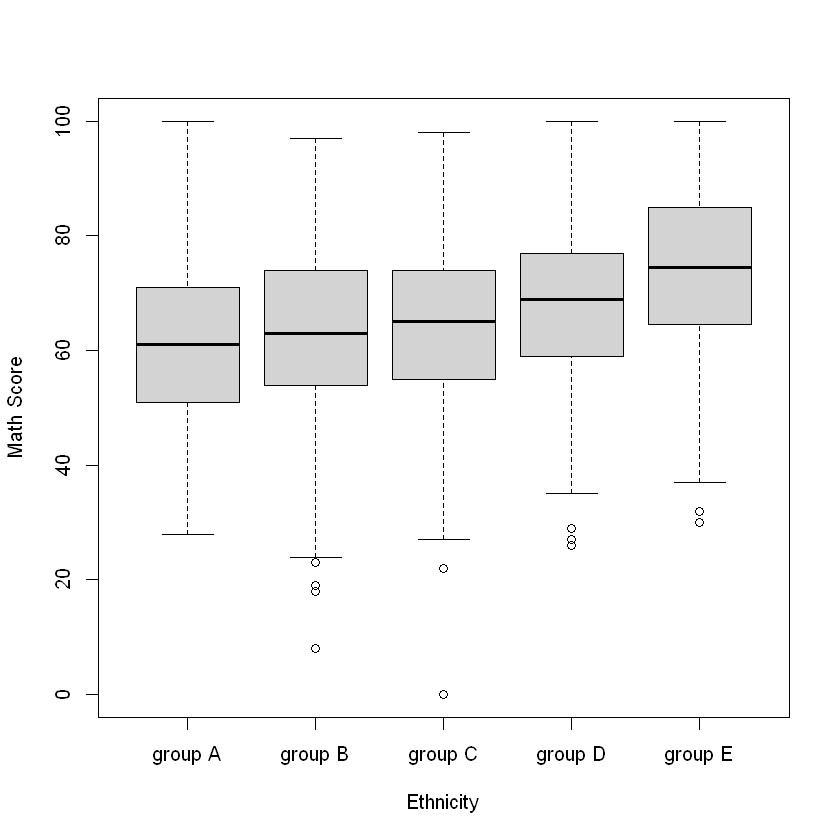

In [26]:
plot(as.factor(Ethnicity),Math,ylab="Math Score",xlab="Ethnicity")

Từ kết quả biểu diễn trên ta có thể thấy được giá trị trung bình các nhóm giao động từ *61.63* đến *73.82* điểm và có sự trên lệch tương đối giữa các nhóm với nhau. _**Phù hợp cho việc sử dụng phương pháp phân tích ANOVA để kiểm định sự có hay không sự khác biệt về khả năng tư duy logic giữa các nhóm dân tộc khác nhau trong thực tế**_.

Để kết quả phân tích ANOVA chuẩn xác hơn, trước tiên ta kiểm tra lại phân bố của tập dữ liệu có tuân theo quy luật phân phối chuẩn hay không dựa vào **biểu đồ Histgram** và **biểu đồ qqNorm** của nó.

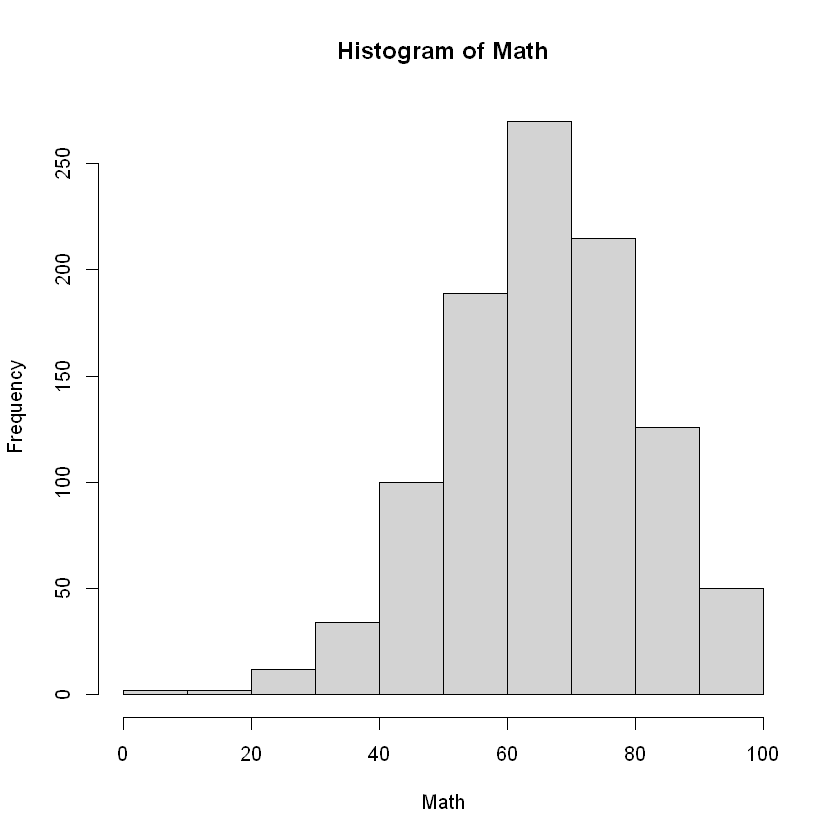

In [27]:
hist(Math)

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

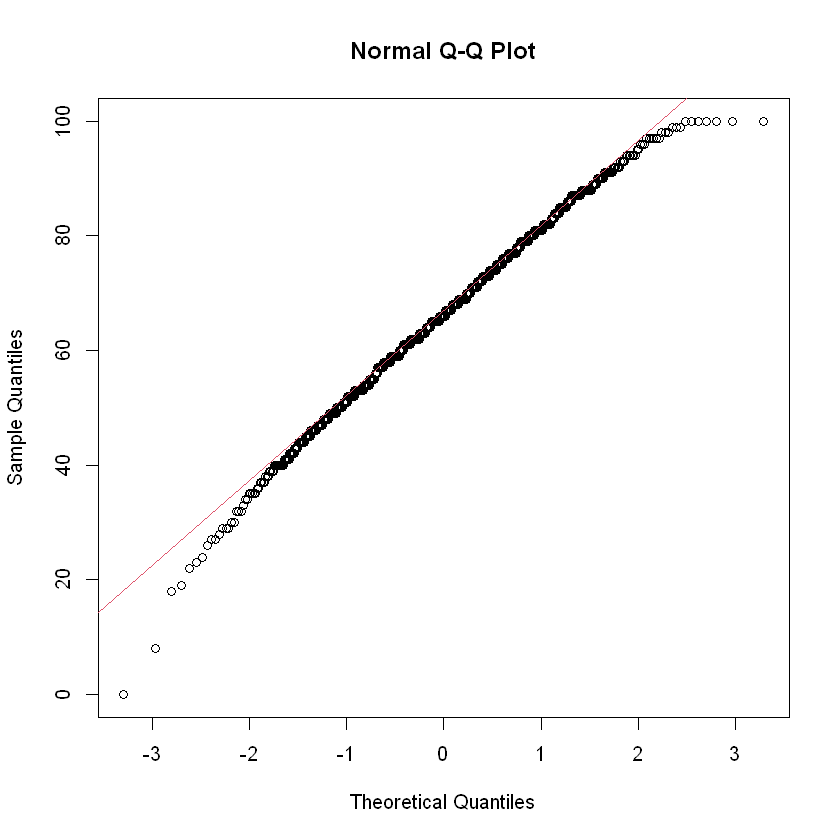

In [31]:
#Xem xét phân bố của dữ liệu
qqnorm(Math)
qqline(Math, col = 2) 

Cả biểu đồ Histgram và qqNorm của dữ liệu đều thể hiện phân bố của dữ liệu gần như tuân theo quy luật phân phối chuẩn. Ta có thể tiến hành phân tích dữ liệu bằng phương pháp ANOVA.

### 3.3. Phân tích phương sai (ANOVA)
<a name ="giathiet"></a>
#### 3.3.1. Giả thiết vô hiệu được đặt ra là: 
> "**Tất cả các nhóm dân tộc khác nhau ở Bồ Đào Nha đều có khả năng tính toán tư duy logic là như nhau**"

#### 3.3.2. Tính toán và lập bảng

In [32]:
av = aov(Math~Ethnicity)
summary(av) #Show the summary of the analysis of variance

             Df Sum Sq Mean Sq F value   Pr(>F)    
Ethnicity     4  12729    3182   14.59 1.37e-11 ***
Residuals   995 216960     218                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

#### Bảng phân tích phương sai  

| Source | SS | df  | MS | $F_{val}$ |
|:------:|---:|----:|----:|:--------:|
|*Between-A*|  12 729  |   4  |3182|14.59|
|  *Within-S(A)*  |  216 960  | 995  |218||
| **Total**| 229 689 | 999 | 3400| |

#### Đánh giá kết quả  
- $F_{value} = 14.59 > F(4,995) = 2.463$ 
- $Pr=1.37 x 10^{-11} < 0.05$  

Vì vậy, <a href="giathiet">giả thiết vô hiệu</a> được bác bỏ. **Nghĩa là có sự khác biệt về tư duy logic tính toán giữa các dân tộc khác nhau**.

## 4. Phân tích hậu định (Post-hoc analysis)
Sau quá trình *phân tích ANOVA*, ta biết được rằng có sự khác biệt về tư duy logic tính toán giữa các nhóm dân tộc khác nhau trên thực tế. Tuy nhiên, để làm rõ hơn sự khác biệt giữa các nhóm với nhau ta cần phải thực hiện phép phân tích hậu định. Trong bài phân tích này ta sử dụng phương pháp **phân tích Tukey's HSD**.
### 4.1. Phương pháp phân tích Tukey's HSD
Gọi $\overline{X_i}$ và $\overline{X_j}$ là giá trị trung bình của nhóm $i$ và $j$. 

Khi đó ta có:
$$Q = \frac{\overline{X_i}-\overline{X_j}}{\sqrt{\frac{MeanSq}{\overline{n}}}}$$


#### Ngưỡng HSD:
$$Q_{k,n-k,\alpha} = \frac{(max\overline{X_i}-min\overline{X_i})\sqrt{\overline{N}}}{\sqrt{{WMS}}}$$

Trong đó giá trị $\overline{N}$ trung bình giữa hai nhóm tính bằng công thức:
$$\overline{N} = \frac{2n_i.n_j}{n_i+n_j}$$

Khi đó, điều kiện để sự khác biệt giữa hai nhóm $X_i$ và $X_j$ có ý nghĩa là: 
$$Q > Q_{k,n-k,\alpha}$$

In [43]:
tukey = TukeyHSD(av)

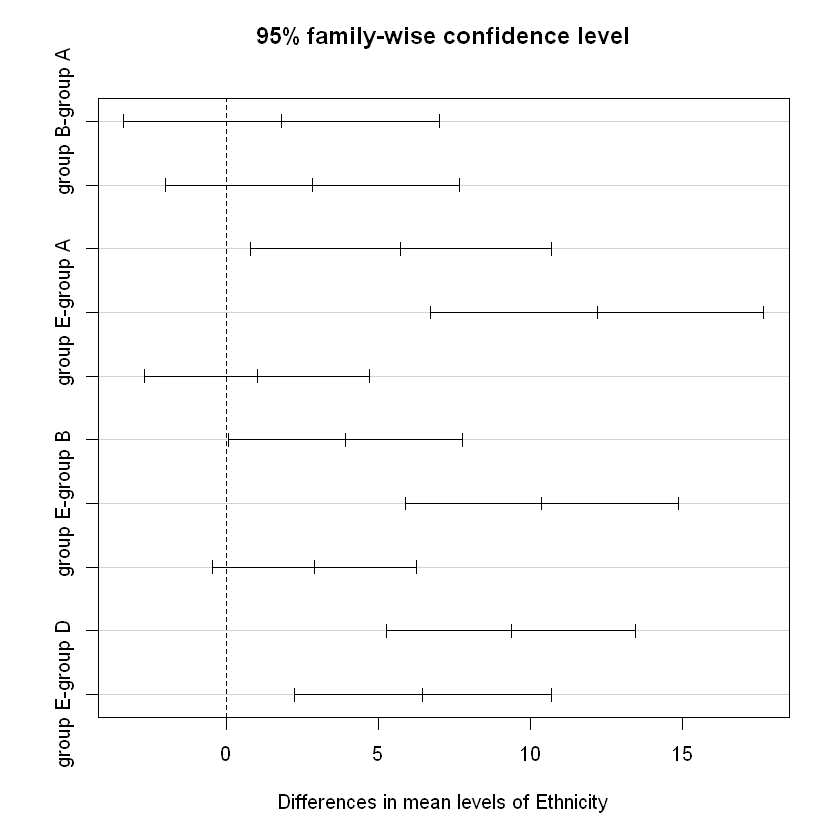

In [46]:
plot(tukey)

Qua biểu đồ thể hiện khoảng tin cậy 95% giữa các nhóm với nhau ở trên ta thấy gồm có 10 phép so sánh giữa từng cặp nhóm với nhau theo thứ tự như sau: *Groups A-B, Groups A-C, Groups A-D, Groups A-E, Groups B-C, Groups B-D, Groups B-E, Groups C-D, Groups C-E* và *Groups D-E*.
Kết quả thể hiện gồm có 4 cặp nhóm không có sự khác biệt với nhau:
- Group A và Group B
- Group A và Group C
- Group B và Group C
- Group C và Group D

## 5. Kết luận
Vậy qua kết quả phân tích tập dữ liệu như trên cho thấy rằng có sự khác biệt về khả năng tư duy logic tính toán giữ các nhóm dân tộc khác nhau. Tuy nhiên, không phải tất cả các nhóm dân tộc đều có khả năng tư duy logic khác nhau, vì có thể sẽ có các nhóm dân tộc có tư duy logic tương đương nhau (như nhóm A, nhóm B và nhóm C ở Bồ Đào Nha).